In [7]:
import sys
import os


# Basic
import numpy as np
import numpy as np

def dummy_npwarn_decorator_factory():
  def npwarn_decorator(x):
    return x
  return npwarn_decorator
np._no_nep50_warning = getattr(np, '_no_nep50_warning', dummy_npwarn_decorator_factory)
import matplotlib.pyplot as plt

# Dataset
from keras.datasets import fashion_mnist

# Evaluation
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

# Your SOM model
from som import SOM


In [8]:
# Load data
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Flatten images from (28,28) to (784,)
X_train = X_train.reshape(-1, 28*28).astype(np.float32) / 255.0
X_test = X_test.reshape(-1, 28*28).astype(np.float32) / 255.0

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (60000, 784)
Test shape: (10000, 784)


In [9]:
# Downsizing

# X_train = X_train[:10000]
# X_test = X_test[:1000]

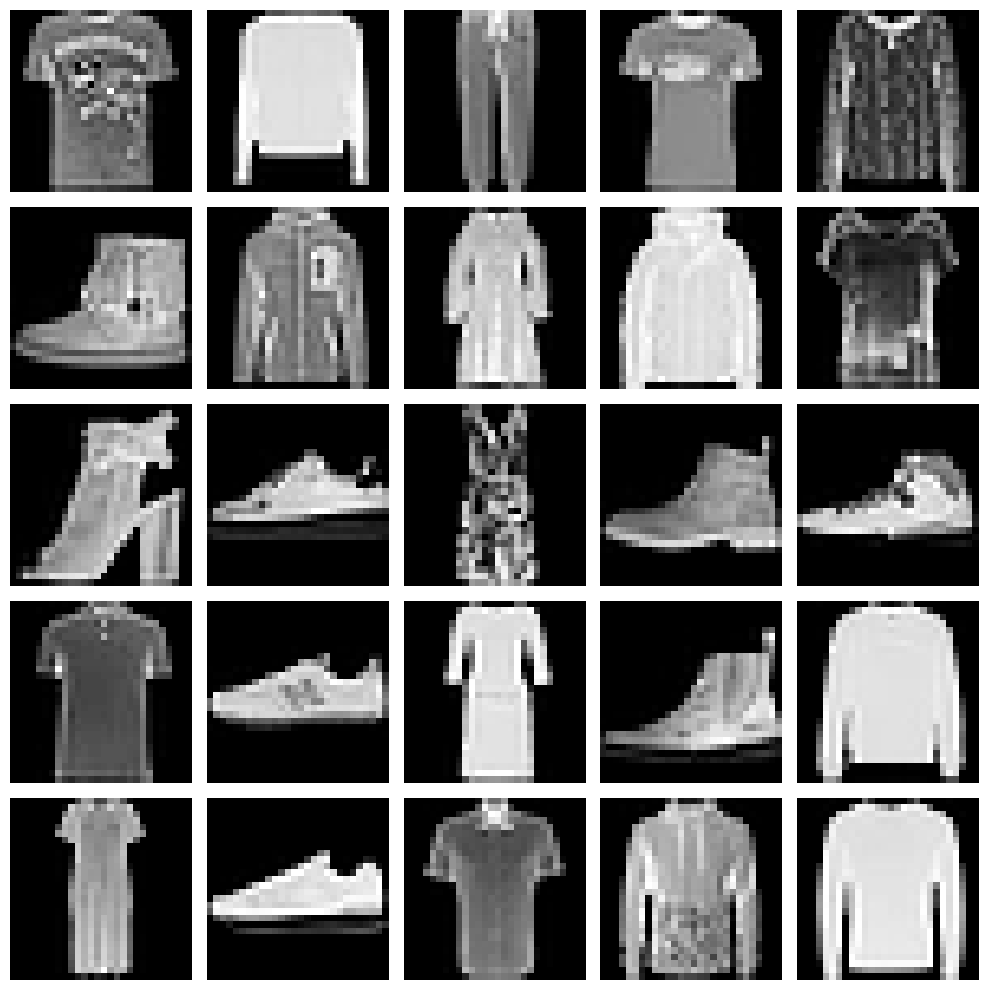

In [10]:
import matplotlib.pyplot as plt
import numpy as np

num_samples = 25  # you can change this
grid_size = int(num_samples ** 0.5)

# randomly select 25 samples from X_train
indices = np.random.choice(len(X_train), size=num_samples, replace=False)
selected_samples = X_train[indices]

fig, axes = plt.subplots(grid_size, grid_size, figsize=(10, 10))
axes = axes.flatten()

for ax, neuron_weights in zip(axes, selected_samples.reshape(-1, 784)):
    img = neuron_weights.reshape(28, 28)
    ax.imshow(img, cmap='gray')
    ax.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
# Initialize SOM
som = SOM(
    lattice_rows=5,
    lattice_columns=5,
    initial_learning_rate=1,
    neighbourhood_radius=3,
    max_iters=1000,
    learning_rate_type="exponential",
    lattice_type="hexagonal",
    random_state=42,
    verbose=True,
    use_tqdm=True
)

# Fit SOM
som.fit(X_train)


 10%|██████████████████████████████                                                                                                                                                                                                                                                                              | 100/1000 [06:47<57:38,  3.84s/it]

Iter: 100: inertia: 3537222.35 | Learning Rate: 0.905 | Neighbourhood factor: 2.715


 20%|████████████████████████████████████████████████████████████                                                                                                                                                                                                                                                | 200/1000 [13:18<54:28,  4.09s/it]

Iter: 200: inertia: 4780948.74 | Learning Rate: 0.819 | Neighbourhood factor: 2.456


 30%|██████████████████████████████████████████████████████████████████████████████████████████                                                                                                                                                                                                                  | 300/1000 [20:01<44:38,  3.83s/it]

Iter: 300: inertia: 3382137.73 | Learning Rate: 0.741 | Neighbourhood factor: 2.222


 40%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                                                                                                    | 400/1000 [26:27<39:58,  4.00s/it]

Iter: 400: inertia: 3022585.89 | Learning Rate: 0.670 | Neighbourhood factor: 2.011


 43%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                                                                                           | 428/1000 [28:20<43:19,  4.55s/it]

In [ ]:
som.plot_inertia()

In [ ]:
som.plot_clusters(X_train, y_train)
som.plot_clusters(X_test, y_test)

In [ ]:
pred.plot_umatrix()

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(5, 5, figsize=(10, 10))
axes = axes.flatten()

for ax, neuron_weights in zip(axes, som.weights_.reshape(-1, 784)):
    img = neuron_weights.reshape(28, 28)
    ax.imshow(img, cmap='gray')
    ax.axis('off')

plt.tight_layout()
plt.show()